Performing Analysis
                                       Review Content Sentiment  Polarity  \
0   Very nice accommodation in an aesthetically pl...  positive  0.259481   
1   Me and my friends had such a nice time at Dott...  positive  0.295833   
2   I stayed for 4night.She gave us a lot of snuck...  positive  0.412500   
3   The apartment was situated on the first floor ...  positive  0.363426   
4   Even though it was only for one night, we had ...  positive  0.344762   
5   We spent four days at Shane's place. The locat...  positive  0.306439   
6   Wonderful experience. We loved staying in the ...  positive  0.355833   
7   Carolines room is perfectly located to discove...  positive  0.515000   
8   We had a great stay in Tyler's apartment. The ...  positive  0.488333   
9   What a wonderful location, right in the heart ...  positive  0.448313   
10  Many thanks Annabel, our stay was perfect! We ...  positive  0.583333   
11  Roel is an excellent host. Good communication,...  p

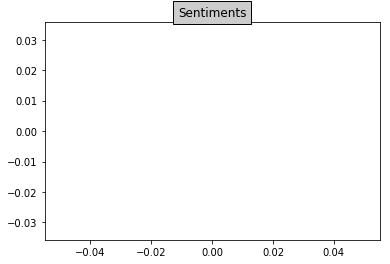

In [2]:
import os
from tkinter import *
from tkinter import ttk
from tkinter.filedialog import askopenfile,asksaveasfile
from tkinter import messagebox
from tkinter import font
import pandas

import reviewsis_module
import visualstats_module


root = Tk()
root.resizable(width=False, height=False)

root.configure(bg="steel blue")
Title = root.title("Twitter Sentiment Analysis")
file_name = ""
adf = []

def open_file():
    analysis_button.config(state = NORMAL)
    #ftypes = [('CSV Files','*.csv')]
    file = askopenfile(mode='rt', filetypes=[('CSV Files','*.csv')])
    global file_name
    file_name = file.name
    if file_name:
        select_label.config(text = " CSV File Selected ")
    root.update()

def analysis():
    global adf
    print("Performing Analysis")
    analysis_content.config(text = "....Performing Analysis....")
    adf = []
    root.update()
    if not file_name:
        messagebox.showwarning("Open File", "No File Selected")
        analysis_content.config(text = "Brief Analysis Content")
        root.update()
    else:
        analysis_content.config(text = "....Performing Analysis....")
        analysis_button.config(state = DISABLED)
        root.update()
        x = reviewsis_module.perform_analysis(str(file_name))
        if x[1]:
            analysis_content.config(text = x[0])
            b1.config(state = NORMAL)
            b2.config(state = NORMAL)
            b3.config(state = NORMAL)
            adf = x[2]
            print(adf)
            select_label.config(text = "Analysis Complete")
        else:
            analysis_content.config(text = x[0])
            
            
    root.update()

def save_analysis():
    file = asksaveasfile(mode='w', defaultextension=".csv", filetypes=[('CSV Files','*.csv')])
    print(file.name, "save file name")
    reviewsis_module.generateCSV(adf,file.name)
    root.update()
    messagebox.showinfo("Saved Analysis", "Successfully Generated and Saved File to :\n" + file.name)

def view_stats():
    print("Viewing Stats")
    visualstats_module.show_visuals(adf)


def copy_content():
    root.clipboard_clear()
    root.clipboard_append(analysis_content['text'])
    root.update()
    messagebox.showinfo("Copy Brief Analysis Content", "Successfully Copied to Clipboard.")

def open_twitterment():
    print("Twitterment Opened")
    os.system("python Twitterment.py") 
    

    
#Defining Widgets and binding commands wherever required
select_label = ttk.Label(root, text = "Select CSV file Containing Review Content                              --->")
open_button = ttk.Button(root, text = "Open File", command = open_file)
analysis_button = ttk.Button(root, text = "Perform Sentiment Analysis", command = analysis)
analysis_content_frame = ttk.Frame(root, borderwidth=5, relief="sunken", width=500, height=300).grid(column=0, row=5, columnspan=3, rowspan=4)
analysis_content = ttk.Label(analysis_content_frame, text = "Brief Analysis Content", anchor=W, wraplength=495)
b1 = ttk.Button(root, text = "Generate and Save Analysis \n\t as CSV ", command = save_analysis, state=DISABLED)
b2 = ttk.Button(root, text = "View Visual Stats",state=DISABLED, command = view_stats)
#b3 = ttk.Button(root, text = "Save Visual Stats",state=DISABLED)
b3 = ttk.Button(root, text = "  Copy Brief Analysis \nContent to Clipboard", command = copy_content, state=DISABLED)
twitter_label = ttk.Label(root, text = "Gain insight on Twitter Tweets - ")
#space = ttk.Frame(root, borderwidth=5, relief="flat", width=400, height=10).grid(column=0, row=9, columnspan=5, rowspan=2)
twitterment_button = ttk.Button(root, text = "Twitter Window", command = open_twitterment)



ttk.Style().configure("TFrame",font=font.Font(family='wasy10',size=80),relief="raised",background="deep sky blue",foreground="blue")

ttk.Style().configure("TLabel",font=font.Font(family='wasy10',size=80),background="light steel blue",foreground="blue")

ttk.Style().configure("TButton",font=font.Font(family='wasy10',size=40),relief="raised",background="black",foreground="blue")


#Setting Layout 
select_label.grid(column=0, row=0, columnspan=3, rowspan=2)
open_button.grid(column=3, row=0, columnspan=3, rowspan=2)
analysis_button.grid(column=1, row=3, columnspan=4, rowspan=2)
analysis_content.grid(column=0, row=5, columnspan=3, rowspan=4)
b1.grid(column=3, row=5, columnspan=3, rowspan=1)
b2.grid(column=3, row=6, columnspan=3, rowspan=1)
#b3.grid(column=3, row=7, columnspan=3, rowspan=1)
b3.grid(column=3, row=7, columnspan=3, rowspan=2)
twitter_label.grid(column=0, row=11, columnspan=3, rowspan=2)
twitterment_button.grid(column=3, row=11, columnspan=3, rowspan=2)

root.mainloop()
